In [4]:
# Task1 Hint: (with sample code for the SIFT detector)
# Initialize SIFT detector, detect keypoints, store and show SIFT keypoints of original image in a Numpy array
# Define parameters for SIFT initializations such that we find only 10% of keypoints
import cv2
import matplotlib.pyplot as plt
import copy

class SiftDetector():
    def __init__(self, norm="L2", params=None):
        self.detector=self.get_detector(params)
        self.norm=norm

    def get_detector(self, params):
        if params is None:
            params={}
            params["n_features"]=0
            params["n_octave_layers"]=3
            params["contrast_threshold"]=0.03
            params["edge_threshold"]=10
            params["sigma"]=1.6

        detector = cv2.xfeatures2d.SIFT_create(
                nfeatures=params["n_features"],
                nOctaveLayers=params["n_octave_layers"],
                contrastThreshold=params["contrast_threshold"],
                edgeThreshold=params["edge_threshold"],
                sigma=params["sigma"])

        return detector
    
# Task2 Hint:
# Upscale the image, compute SIFT features for rescaled image
# Apply BFMatcher with defined params and ratio test to obtain good matches, and then select and draw best 5 matches

# Task3 Hint: (with sampe code for the rotation)
# Rotate the image and compute SIFT features for rotated image
# Apply BFMatcher with defined params and ratio test to obtain good matches, and then select and draw best 5 matches
import math
import numpy as np
import sys

# image: image to rotate
# x:     x-coordinate of point we wish to rotate around
# y:     y-coordinate of point we wish to rotate around
# angle: degrees to rotate image by
#
# Returns a rotated copy of the original image
def rotate(image, x, y, angle):
    rot_matrix = cv2.getRotationMatrix2D((x, y), angle, 1.0)
    h, w = image.shape[:2]

    return cv2.warpAffine(image, rot_matrix, (w, h))

# Get coordinates of center point.
#
# image:  Image that will be rotated
# return: (x, y) coordinates of point at center of image
def get_img_center(image):
    height, width = image.shape[:2]
    center = height // 2, width // 2

    return center


In [5]:
img = cv2.imread('COMP9517_20T2_Lab2_Image.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
# img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

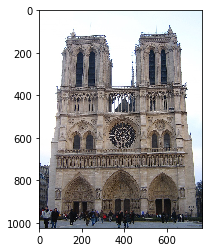

In [6]:
plt.imshow(img)

In [7]:
A = SiftDetector()
detector_1 = A.get_detector(params=None)
detector_1

<xfeatures2d_SIFT 0x1167a30b0>

In [8]:
kp1, des1 = detector_1.detectAndCompute(img, None)

In [9]:
img_kp = copy.deepcopy(img)
img_kp = cv2.drawKeypoints(img, kp1, img_kp, color=(255,0,255))

In [10]:
len(kp1)

6043

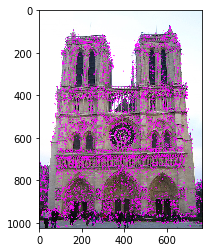

In [11]:
plt.imshow(img_kp)

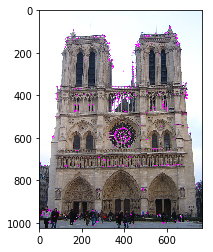

In [12]:
parameters = {'n_features':600, 'n_octave_layers':3, 'contrast_threshold':0.1, 'edge_threshold':10, 'sigma':1.6}
B = SiftDetector()
detector_2 = B.get_detector(parameters)
kp2, des2 = detector_2.detectAndCompute(img, None)
img_kp_2 = copy.deepcopy(img)
img_kp_2 = cv2.drawKeypoints(img, kp2, img_kp_2, color=(255,0,255))
plt.imshow(img_kp_2)

In [13]:
#nfeatures：特征点数目（算法对检测出的特征点排名，返回最好的nfeatures个特征点）。
#nOctaveLayers：金字塔中每组的层数（算法中会自己计算这个值，后面会介绍）。
#contrastThreshold：过滤掉较差的特征点的对阈值。contrastThreshold越大，返回的特征点越少。
#edgeThreshold：过滤掉边缘效应的阈值。edgeThreshold越大，特征点越多（被过滤掉的越少）。
#sigma：金字塔第0层图像高斯滤波系数，也就是σ。

#nfeatures指定最终返回的特征点数量，并不影响SIFT特征检测的结果
#参数nOctaveLayers和sigma主要影响图像高斯金字塔的构成，
#contrastThreshold和edgeThreshold则影响在DOG中寻找极值点的过程与结果。

In [14]:
#task2

In [15]:
height, width = int(img.shape[0]*1.15), int(img.shape[1]*1.15)
height

1177

In [16]:
img_scale = cv2.resize(img, dsize=(width, height), interpolation=cv2.INTER_NEAREST)

In [17]:
img.shape

(1024, 768, 3)

In [18]:
img_scale.shape

(1177, 883, 3)

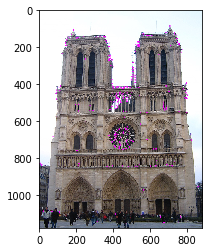

In [19]:
kp_scale, des_scale = detector_2.detectAndCompute(img_scale, None)
img_scale_2 = copy.deepcopy(img_scale)
img_scale_2 = cv2.drawKeypoints(img_scale, kp_scale, img_scale_2, color=(255,0,255))
plt.imshow(img_scale_2)

In [20]:
# bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
bf = cv2.BFMatcher()
matches_scale = bf.match(des2, des_scale)
matches_scale = sorted(matches_scale, key = lambda x:x.distance)
img3 = cv2.drawMatches(img_kp_2,kp2,img_scale_2,kp_scale,matches_scale[:5], None,flags=2)

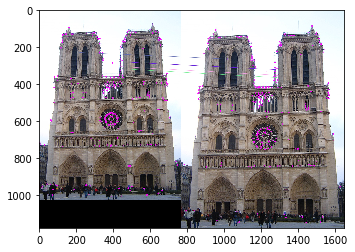

In [21]:
plt.imshow(img3)

In [22]:
#task 3

In [23]:
center = get_img_center(img)
center

(512, 384)

In [24]:
img_rotate_1 = rotate(img, center[0], center[1], 60)

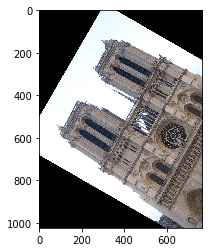

In [25]:
plt.imshow(img_rotate_1)

In [26]:
img_rotate_2 = rotate(img, center[0], center[1], -60)

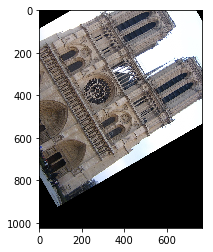

In [27]:
plt.imshow(img_rotate_2)

In [42]:
def rotate_bound(image, angle):
    # grab the dimensions of the image and then determine the
    # center
    (h, w) = image.shape[:2]
    (cX, cY) = (w // 2, h // 2)
    print(cX, cY)
 
    # grab the rotation matrix (applying the negative of the
    # angle to rotate clockwise), then grab the sine and cosine
    # (i.e., the rotation components of the matrix)
    M = cv2.getRotationMatrix2D((cX, cY), -angle, 1.0)
    cos = np.abs(M[0, 0])
    sin = np.abs(M[0, 1])
    print(sin)
 
    # compute the new bounding dimensions of the image
    nW = int((h * sin) + (w * cos))
    nH = int((h * cos) + (w * sin))
    print(M)
    print(nW)
    # adjust the rotation matrix to take into account translation
    M[0, 2] += ((nW / 2) - cX)
    M[1, 2] += (nH / 2) - cY
    print(M)
 
    # perform the actual rotation and return the image
    return cv2.warpAffine(image, M, (nW, nH))

In [43]:
img_rotate_3 = rotate_bound(img, 60)

384 512
0.8660254037844386
[[ 5.00000000e-01 -8.66025404e-01  6.35405007e+02]
 [ 8.66025404e-01  5.00000000e-01 -7.65537551e+01]]
1270
[[ 5.00000000e-01 -8.66025404e-01  8.86405007e+02]
 [ 8.66025404e-01  5.00000000e-01 -5.37550532e-02]]


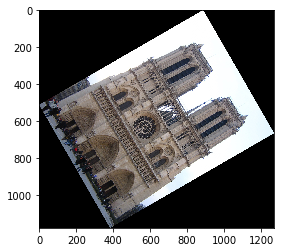

In [30]:
plt.imshow(img_rotate_3)